### Importations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from petpropy import z_g, c_g, rho_g, mu_g, Bg, pc_g

### Tabla of Components and Fractions

| Components | Fraction. Mol. (yi) |
|------------|---------------------|
|H2S|0.0491|
|CO2|0.1101|
N2|0.0051
C1|0.5770
C2|0.0722
C3|0.0455
i-C4|0.0096
n-C4|0.0195
i-C5|0.0078
n-C5|0.0071
n-C6|0.0145
C7+|0.0835


### Critical Properties

In [2]:
m_C7 = 142 #lb/lb-mol
gamma_C7 = 0.807

In [4]:
pc_C7 = pc_g.mathews_roland_correlation_c7(m_C7, gamma_C7)
print(pc_C7)

{'PpcC7=': 370.30177, 'TpcC7=': 1144.22691}


In [8]:
pc_gas = pc_g.kay(pc_C7['PpcC7='], pc_C7['TpcC7='])
print(pc_gas)

Available mix componentes: ['C1', 'C2', 'C3', 'n-C4', 'i-C4', 'n-C5', 'i-C5', 'n-C6', 'n-C7', 'n-C8', 'n-C9', 'n-C10', 'N2+O2', 'CO2', 'He', 'H2S', 'N2', 'O2', 'C7+']
Componentes de la mezcla disponibles: ['C1', 'C2', 'C3', 'n-C4', 'i-C4', 'n-C5', 'i-C5', 'n-C6', 'n-C7', 'n-C8', 'n-C9', 'n-C10', 'N2+O2', 'CO2', 'He', 'H2S', 'N2', 'O2', 'C7+']
{'Ppc=': 709.388847795, 'Tpc=': 505.905642985}


In [9]:
gamma_gas = 1.242
y_H2S = 0.0491
y_CO2 = 0.1101
y_N2 = 0.0051

In [10]:
pc_gas = pc_g.brown_katz_grv(gamma_gas, yCO2=y_CO2, yH2S=y_H2S, yN2=y_N2)
print(pc_gas)

[719.5657424871266, 548.4013034957087]


### Gas Compressibility Factor (Z)

In [11]:
pressures = np.arange(500, 10500, 500)
temperature = 654
temp_critica = pc_gas[1]
pres_critica = pc_gas[0]

In [12]:
z_factor = z_g.dranchuk_purvis_robinson(pressures, temperature, pres_critica, temp_critica)
print(z_factor)

[0.84674675 0.66908326 0.52789822 0.51240399 0.55547705 0.61553793
 0.68099454 0.74830057 0.81614041 0.88395513 0.95148812 1.0186185
 1.08529141 1.15148592 1.21719915 1.28243793 1.34721425 1.4115427
 1.475439   1.53891915]


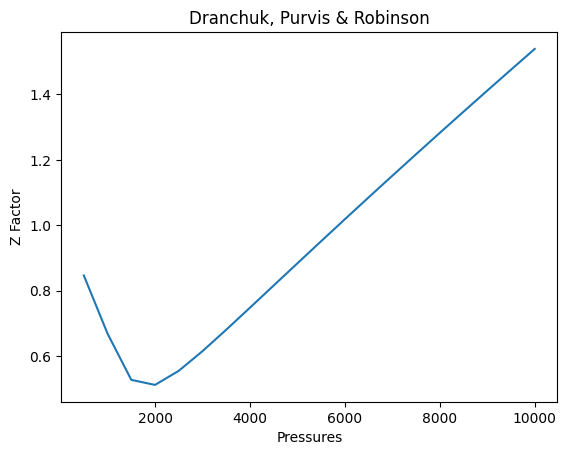

In [14]:
plt.plot(pressures, z_factor)
plt.title('Dranchuk, Purvis & Robinson')
plt.xlabel('Pressures')
plt.ylabel('Z Factor')
plt.show()

In [15]:
z_factor = z_g.dranchuk_abou_kassem(pressures, temperature, pres_critica, temp_critica)
print(z_factor)

[0.84764491 0.67150567 0.53015037 0.51347354 0.55667447 0.61696774
 0.68260434 0.75004434 0.81798423 0.88587317 0.9534598  1.02062674
 1.08732164 1.15352543 1.21923667 1.28446333 1.34921833 1.41351705
 1.47737587 1.54081136]


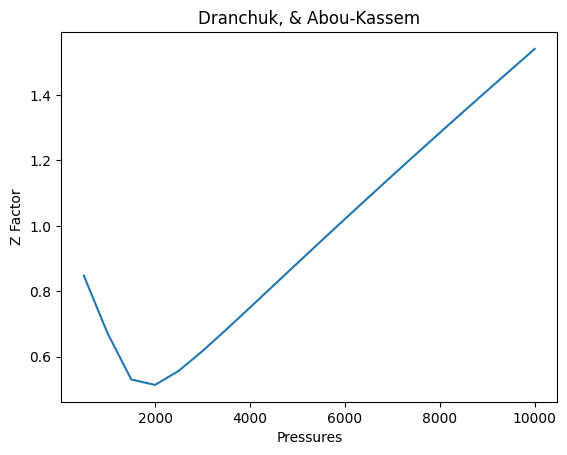

In [16]:
plt.plot(pressures, z_factor)
plt.title('Dranchuk, & Abou-Kassem')
plt.xlabel('Pressures')
plt.ylabel('Z Factor')
plt.show()

### Gas Volumetric Factor

In [17]:
bg = Bg.B_g(pressures, temperature, z_factor)
print(bg)

[0.0313435 0.0124152 0.0065345 0.0047467 0.0041168 0.0038023 0.0036058
 0.0034668 0.0033607 0.0032757 0.0032051 0.003145  0.0030928 0.0030467
 0.0030056 0.0029685 0.0029347 0.0029038 0.0028752 0.0028487]


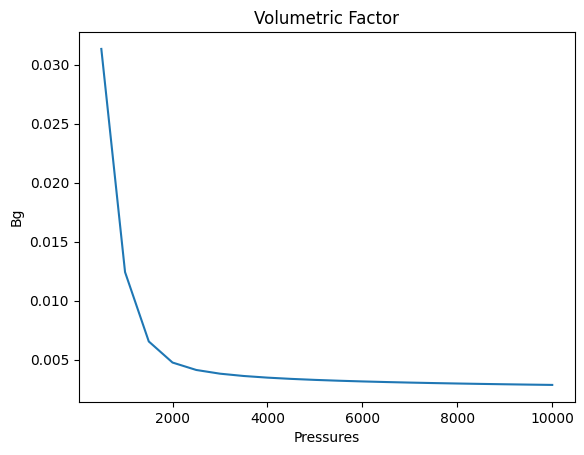

In [23]:
plt.plot(pressures, bg)
plt.title('Volumetric Factor')
plt.xlabel('Pressures')
plt.ylabel('Bg')
plt.show()

### Gas Viscosity

In [21]:
mu_gas = mu_g.lee_gonzalez_eakin(pressures, temperature, Mg=35.969, z=z_factor) # Mg = Weight Molecular
print(mu_gas)

[0.0120566 0.0152326 0.023746  0.0357469 0.0457178 0.0535954 0.0601771
 0.0659266 0.0711012 0.0758546 0.0802853 0.08446   0.0884262 0.092219
 0.0958648 0.0993845 0.1027945 0.1061081 0.1093364 0.1124883]


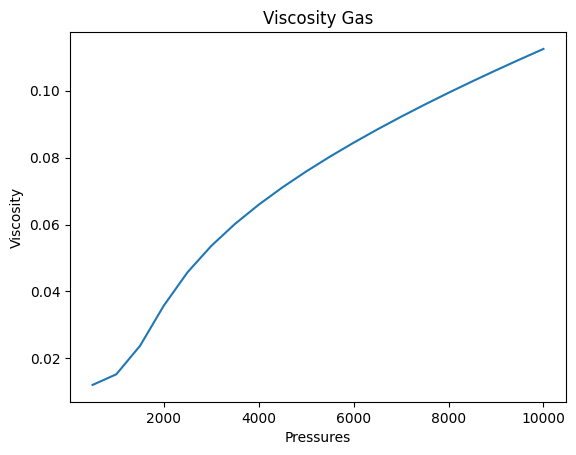

In [24]:
plt.plot(pressures, mu_gas)
plt.title('Viscosity Gas')
plt.xlabel('Pressures')
plt.ylabel('Viscosity')
plt.show()

### Gas Compressibility

In [25]:
cg = c_g.papay(pressures, temperature, pres_critica, temp_critica, z_factor)
print(cg)

[ 2.32347338e-03  1.32441644e-03  9.71305517e-04  7.04803779e-04
  4.87696210e-04  3.21136847e-04  1.92149223e-04  8.97281446e-05
  6.38177986e-06 -6.29012433e-05 -1.21540426e-04 -1.71932453e-04
 -2.15801963e-04 -2.54420164e-04 -2.88744324e-04 -3.19509099e-04
 -3.47287861e-04 -3.72534838e-04 -3.95614709e-04 -4.16823781e-04]


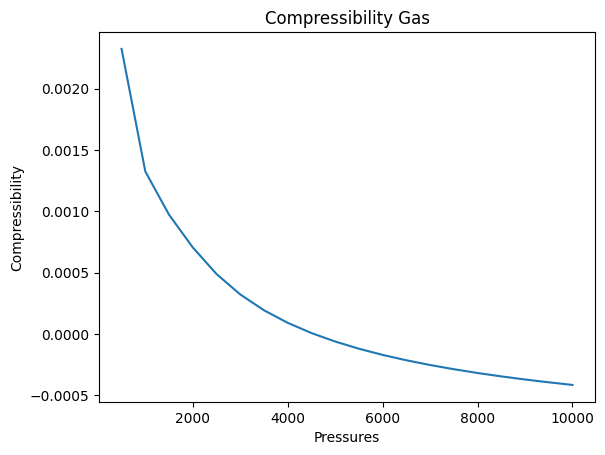

In [26]:
plt.plot(pressures, cg)
plt.title('Compressibility Gas')
plt.xlabel('Pressures')
plt.ylabel('Compressibility')
plt.show()

In [27]:
cg = c_g.gopal(pressures, temperature, pres_critica, temp_critica, z_factor)
print(cg)

[2.37155821e-03 1.25683411e-03 9.91981090e-04 8.35880138e-04
 1.89597345e-04 1.43492312e-04 1.14127644e-04 7.89653249e-05
 6.53932938e-05 5.51896654e-05 4.72728237e-05 4.09756725e-05
 3.58648820e-05 3.16471195e-05 2.81170176e-05 2.51267008e-05
 2.25671246e-05 2.03562172e-05 1.84310981e-05 1.67428323e-05]


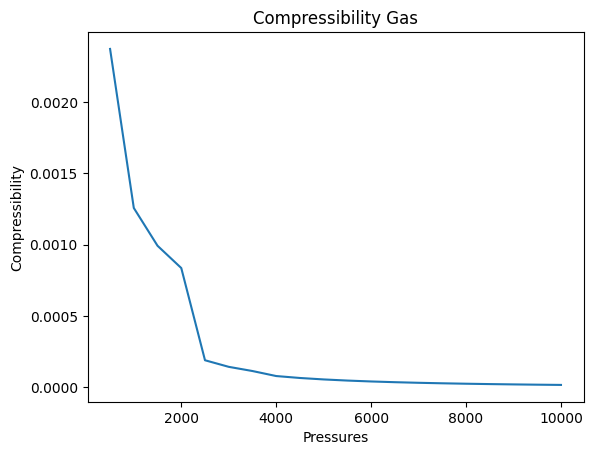

In [28]:
plt.plot(pressures, cg)
plt.title('Compressibility Gas')
plt.xlabel('Pressures')
plt.ylabel('Compressibility')
plt.show()